# Visualization

Model trained with KO gene has labels and tested between guides that knock out the same gene.

### Imports

In [1]:
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
repo_path = '/Users/mincheolkim/Github/'
data_path = '/Users/mincheolkim/Documents/'

In [3]:
import sys
sys.path.append(repo_path + 'scVI')
sys.path.append(repo_path + 'scVI-extensions')

In [12]:
import os

import numpy as np
from sklearn.manifold import TSNE
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
import pandas as pd
import torch
import imp
from scipy.stats import ttest_ind, wasserstein_distance, ks_2samp
from scipy.stats import norm
from sklearn.manifold import TSNE

from scvi.metrics.clustering import entropy_batch_mixing, get_latent
from scvi.models import VAE, SVAEC, VAEC
from scvi.inference import VariationalInference

In [5]:
import scvi_extensions.dataset.supervised_data_loader as sdl
import scvi_extensions.dataset.cropseq as cs
import scvi_extensions.inference.supervised_variational_inference as svi
import scvi_extensions.hypothesis_testing.mean as mn
import scvi_extensions.hypothesis_testing.variance as vr
import scvi_extensions.dataset.label_data_loader as ldl

### Load the model

In [24]:
kogene_model = torch.load('/Users/mincheolkim/Documents/vaec_model_vargenes_kogene.model', map_location=lambda storage, loc: storage)
louvain_model = torch.load('/Users/mincheolkim/Documents/vaec_model_vargenes_louvain.model', map_location=lambda storage, loc: storage)

### Create the dataset with guides as labels

In [25]:
h5_filename = data_path + 'raw_gene_bc_matrices_h5.h5'
metadata_filename = data_path + 'nsnp20.raw.sng.km_vb1.norm.meta.txt'

In [8]:
imp.reload(cs)
# Load the dataset
gene_dataset = cs.CropseqDataset(
    filename=h5_filename,
    metadata_filename=metadata_filename,
    new_n_genes=1000,
    use_donors=True,
    use_labels='louvain',
    save_path='')

Preprocessing CROP-seq dataset
Number of cells kept after filtering with metadata: 283634
Number of cells kept after removing all zero cells: 283634
Finished preprocessing CROP-seq dataset
Downsampling from 32738 to 1000 genes


### Create a dataloader

In [28]:
data_loader = sdl.SupervisedTrainTestDataLoaders(gene_dataset, num_samples=5000)

In [29]:
kogene_latent, kogene_batch_indices, kogene_labels = get_latent(kogene_model, data_loader['all'])
louvain_latent, louvain_batch_indices, louvain_labels = get_latent(louvain_model, data_loader['all'])

In [ ]:
kogene_embedded = TSNE(n_components=2).fit_transform(kogene_latent)

In [57]:
louvain_embedded = TSNE(n_components=2).fit_transform(louvain_latent)

In [48]:
kogene_labels

array([9, 1, 7, ..., 1, 6, 5])

Text(0.5,1,'tSNE of 5000 sampled cells (weighted), colored by donor')

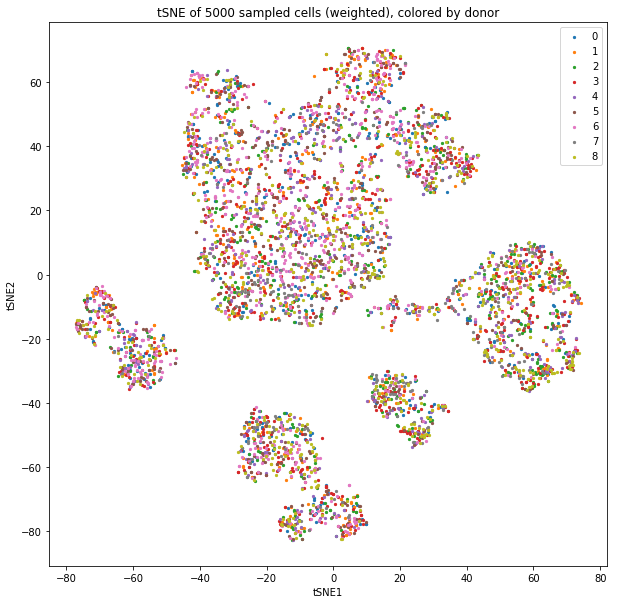

In [55]:
plt.figure(figsize=(10, 10))
for label in np.unique(kogene_batch_indices):
    plt.scatter(kogene_embedded[kogene_batch_indices.reshape(-1) == label, 0], kogene_embedded[kogene_batch_indices.reshape(-1) == label, 1], s=5)
plt.legend(np.unique(labels))
plt.xlabel('tSNE1');plt.ylabel('tSNE2');plt.title('tSNE of 5000 sampled cells (weighted), colored by donor')

Text(0.5,1,'tSNE of 5000 sampled cells (weighted)')

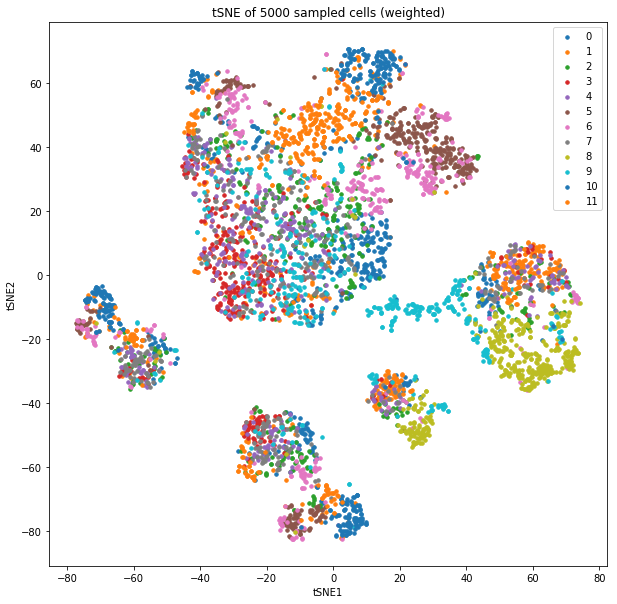

In [52]:
plt.figure(figsize=(10, 10))
for label in np.unique(kogene_labels):
    plt.scatter(kogene_embedded[kogene_labels == label, 0], kogene_embedded[kogene_labels == label, 1], s=12)
plt.legend(np.unique(kogene_labels))
plt.xlabel('tSNE1');plt.ylabel('tSNE2');plt.title('tSNE of 5000 sampled cells (weighted)')

Text(0.5,1,'tSNE of 5000 sampled cells (weighted)')

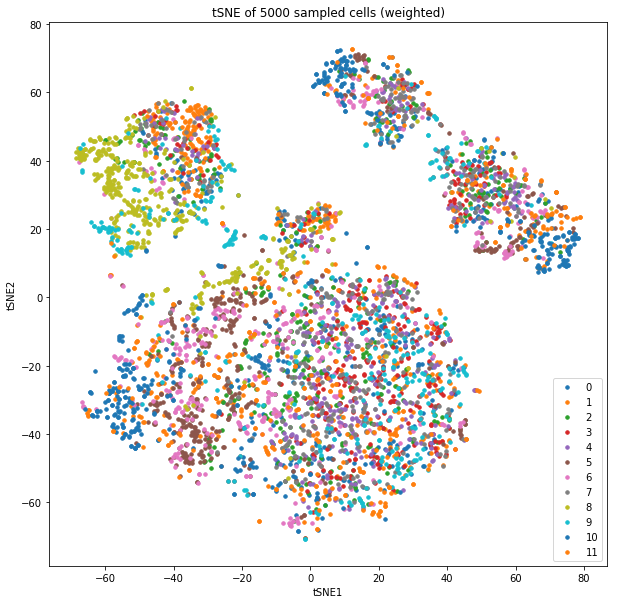

In [56]:
plt.figure(figsize=(10, 10))
for label in np.unique(louvain_labels):
    plt.scatter(louvain_embedded[louvain_labels == label, 0], louvain_embedded[louvain_labels == label, 1], s=12)
plt.legend(np.unique(louvain_labels))
plt.xlabel('tSNE1');plt.ylabel('tSNE2');plt.title('tSNE of 5000 sampled cells (weighted)')